In [1]:
import serial
import time
import csv
import sys
import random
import numpy as np
from math import inf
from collections import deque

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from scipy.signal import butter, filtfilt

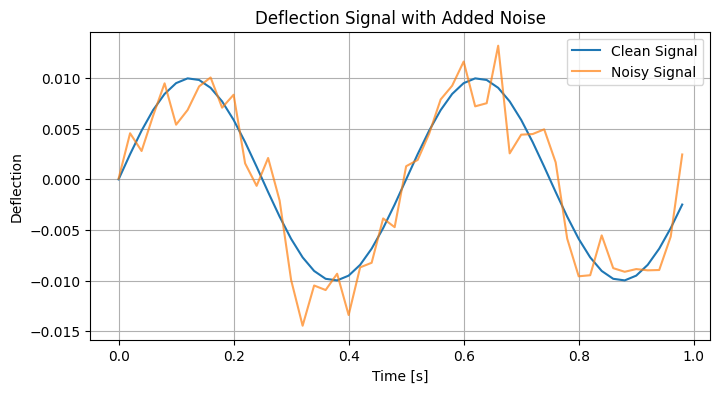

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Define sampling frequency (samples per second)
fs = 50  

# 2) Create a time array of 1 second duration using the sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)

# 3) Generate the clean deflection signal:
#    - Amplitude: 0.01
#    - Frequency: 2 Hz (since 2*(1/50) in your original formula is effectively 2/50 = 0.04 => 2*pi*0.04 = 2*pi*2/50)
#    - We create a sine wave over the entire `t` array.
deflection_clean = 0.01 * np.sin(2 * np.pi * 2 * t)

# 4) Define how "strong" the random noise should be
noise_amplitude = 0.002

# 5) Generate random noise (Gaussian “white” noise) of the same length as our time array
noise = noise_amplitude * np.random.randn(len(t))

# 6) Create the noisy signal by adding the random noise to the clean signal
deflection_noisy = deflection_clean + noise

# 7) Plot both the clean and noisy signals for comparison
plt.figure(figsize=(8, 4))
plt.plot(t, deflection_clean, label="Clean Signal")
plt.plot(t, deflection_noisy, label="Noisy Signal", alpha=0.7)
plt.xlabel("Time [s]")
plt.ylabel("Deflection")
plt.title("Deflection Signal with Added Noise")
plt.legend()
plt.grid(True)
plt.show()


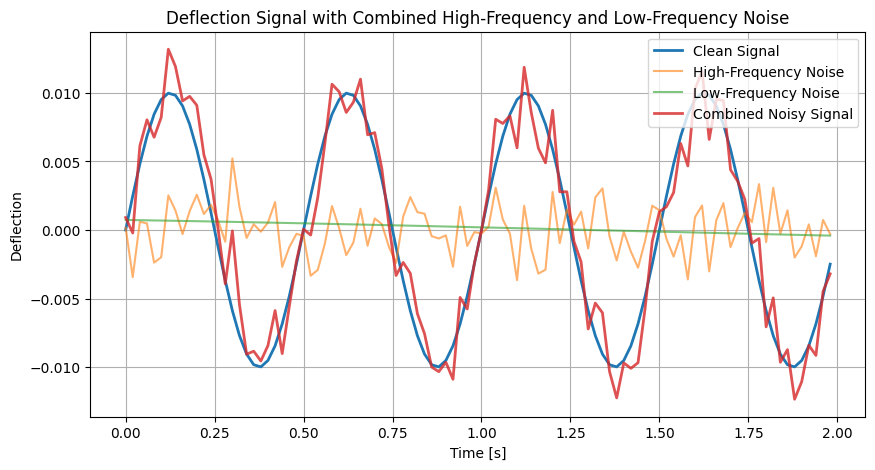

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Define simulation parameters
fs = 50            # sampling frequency (samples per second)
duration = 2       # duration of signal in seconds
t = np.linspace(0, duration, int(fs*duration), endpoint=False)

# 2) Create the clean deflection signal
#    - We consider your original formula but extended over time: 
#      deflection_clean = 0.01 * sin(2*pi*2*t)
deflection_clean = 0.01 * np.sin(2 * np.pi * 2 * t)

# 3) Generate high-frequency noise (Gaussian “white” noise)
hf_noise_amplitude = 0.002
hf_noise = hf_noise_amplitude * np.random.randn(len(t))

# 4) Generate low-frequency noise
#    - One simple approach is another sinusoid at a much lower frequency, e.g., 0.1 Hz
#    - We can also add a random phase shift for realism
lf_noise_amplitude = 0.001
low_freq = 0.1  # 0.1 Hz
random_phase = 2 * np.pi * np.random.rand()  # random phase in [0, 2*pi]
lf_noise = lf_noise_amplitude * np.sin(2 * np.pi * low_freq * t + random_phase)

# 5) Combine the clean signal with HF noise and LF noise
deflection_noisy = deflection_clean + hf_noise + lf_noise

# 6) Plot all components for comparison
plt.figure(figsize=(10, 5))

plt.plot(t, deflection_clean, label="Clean Signal", linewidth=2)
plt.plot(t, hf_noise, label="High-Frequency Noise", alpha=0.6)
plt.plot(t, lf_noise, label="Low-Frequency Noise", alpha=0.6)
plt.plot(t, deflection_noisy, label="Combined Noisy Signal", linewidth=2, alpha=0.8)

plt.xlabel("Time [s]")
plt.ylabel("Deflection")
plt.title("Deflection Signal with Combined High-Frequency and Low-Frequency Noise")
plt.legend()
plt.grid(True)
plt.show()


In [3]:
duration = 200
refinement = 1

start_time = []

time_val_list = []
load_val_list = []
deflection_val_list = []

load_clean_val_list = []
deflection_clean_val_list = []

In [4]:
def load_deflection_clean_val():
    elapsed_time = (time.perf_counter_ns() - start_time[0]) / 10e9
    time_val_list.append(elapsed_time)

    deflection_clean = 0.01 * np.sin(2 * np.pi * 2 * elapsed_time)
    deflection_clean_val_list.append(deflection_clean)

    load_clean = 1000 + 50 * np.sin(2 * np.pi * 0.5 * elapsed_time)
    load_clean_val_list.append(load_clean)
    return

In [5]:
def noise_generator():
    fs = 50 # samples recorded every second.

    noise_lf = np.random.randn(len(load_clean_val_list)) * 0.001
    nyquist = fs / 2.0
    cut_off_lf = 1.0/nyquist
    lf_b, lf_a = butter(4, cut_off_lf, btype='low')
    lf_noise = filtfilt(lf_b, lf_a, noise_lf)

    noise_hf = np.random.randn(len(load_clean_val_list)) * 0.001
    cut_off_hf = 10.0/nyquist
    hf_b, hf_a = butter(4, cut_off_hf, btype='high')
    hf_noise = filtfilt(hf_b, hf_a, noise_hf)
    total_noise = lf_noise + hf_noise
    return total_noise

In [6]:
def load_deflection_val():
    # load = np.random.normal(0, 100)
    # deflection = np.random.normal(0, 10)

    deflection_clean = deflection_clean_val_list[:]
    deflection_noise_val = noise_generator()
    deflection_noise = deflection_clean + deflection_noise_val
    # deflection_val_list.append(deflection_noise)

    load_clean = load_clean_val_list[:]
    load_noise_val = noise_generator()
    load_noise = load_clean + load_noise_val
    # load_val_list.append(load_noise)
    # print(type(load_noise))
    # print(load_noise.shape)
    return load_noise, deflection_noise

In [7]:
def synthetic_sensor_data():
    start_time.append(time.perf_counter_ns())
    i = 0
    while True:
        if i == 50:
            break
        load_deflection_clean_val()
        i += 1
    load_deflection_val()
    return

synthetic_sensor_data()
load_noise_array, deflection_noise_array = load_deflection_val()
print(len(load_noise_array))
print(load_noise_array.shape)

50
(50,)
